In [25]:
import notebook_util
import cv2
from matplotlib import pyplot as plt
import numpy as np
notebook_util.override_imshow(cv2)

%matplotlib inline

## Translate

We can use a **warpAffine**. An affine translation is one such that the paralelism is maintained in the new image. In other words, paralel lines in the old image are still paralel in the new image.

Showing Image: Translation


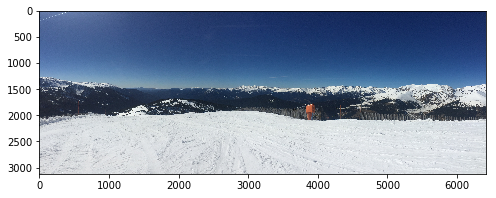

In [58]:
image_data = cv2.imread("./resources/andorra.jpg")
cv2.imshow('Translation', image_data, (8,3))

we need to give a translation matrix of the kind:

||||
|-------|---|------------|
|   1   | 0 | < x move > |
|   0   | 1 | < y move > |

Showing Image: Translation


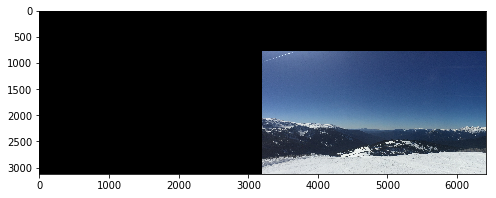

In [36]:
# Store height and width of the image
height, width = image_data.shape[:2]

## the translation is given in pixel units
x_move = width/2   # half the width
y_move = height/4  # quarter of the height


# T is our translation matrix
T = np.float32([[1, 0, translate_in_x_by], [0, 1,translate_in_y_by]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image_data, T, (width, height))
cv2.imshow('Translation', img_translation, (8,3))

In [37]:
image_data.shape

(3120, 6414, 3)

In [38]:
translate_in_x_by, translate_in_y_by

(3207, 780)

In [39]:
T.astype(np.int)

array([[   1,    0, 3207],
       [   0,    1,  780]])

## Rotate

Showing Image: Rotated Image


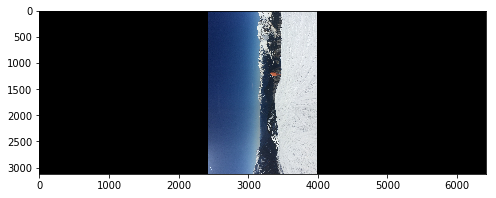

In [52]:

height, width = image_data.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, .5)

# we still use affine. But we don't need to build the matrix
# by ourselves. The getRotationMatrix2D does that for us
rotated_image = cv2.warpAffine(image_data, rotation_matrix, (width, height))

cv2.imshow('Rotated Image', rotated_image, (8,3))

Showing Image: Rotated Image - Method 2


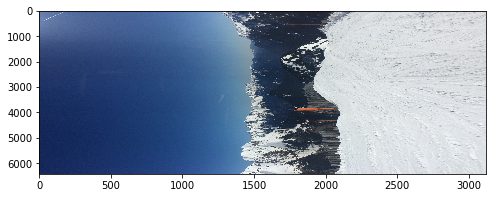

In [55]:
#A simpler way to rotate
rotated_image = cv2.transpose(image_data)

cv2.imshow('Rotated Image - Method 2', rotated_image, (8,3))

## Flip

Showing Image: Horizontal Flip


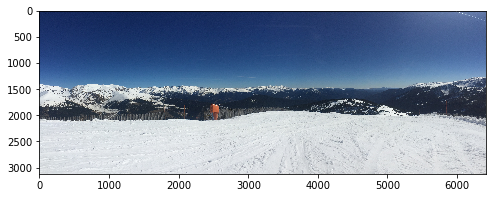

In [59]:
# Let's now to a horizontal flip.
flipped = cv2.flip(image_data, 1)
cv2.imshow('Horizontal Flip', flipped, (8,3))

## Scale

Showing Image: 'Original' image


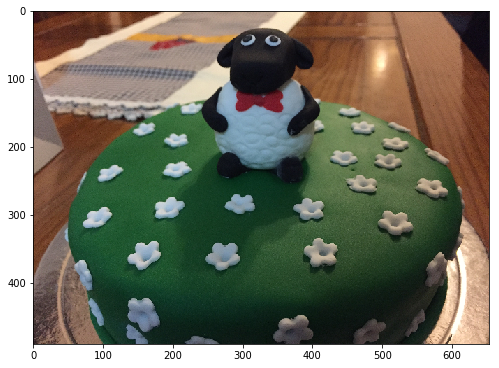

In [105]:
image_data = cv2.imread("./resources/cake2.jpg")
image_data = cv2.resize(image_data, None, fx=0.2, fy=0.2) ## we're doing this just so our file fits in the jupyter pipeline. But asume this the original image.
cv2.imshow("'Original' image", image_data)

Showing Image: Scaling - Linear Interpolation


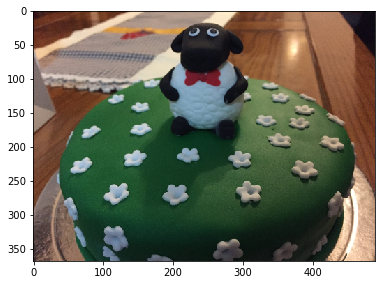

In [116]:
# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image_data, None, fx=0.75, fy=0.75)
cv2.imshow('Scaling - Linear Interpolation', image_scaled)

Showing Image: Scaling - Linear Interpolation


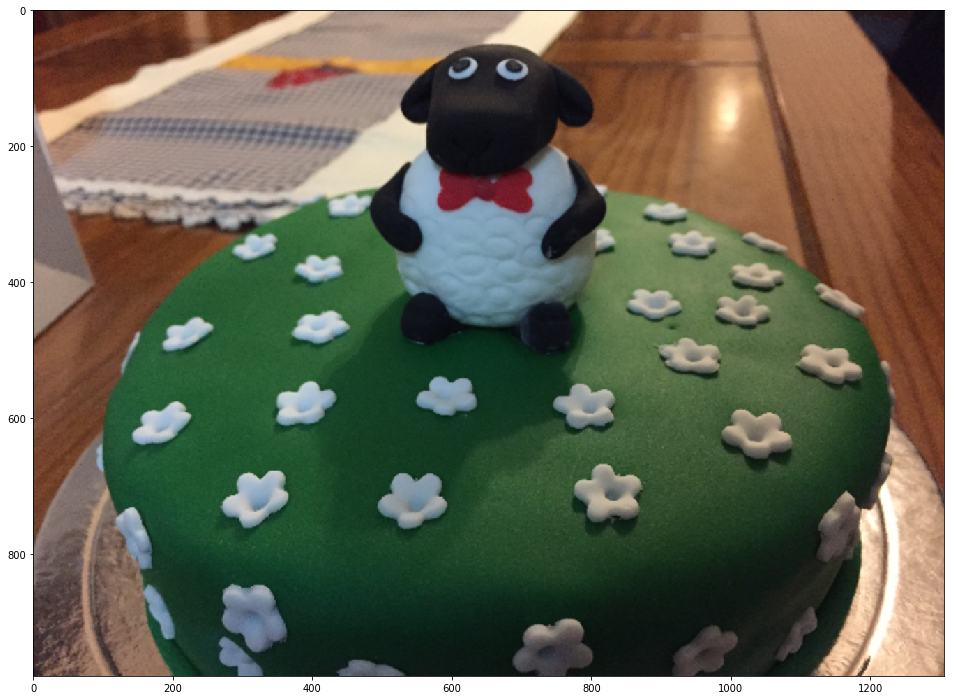

In [117]:
# Let's double the size of our image
img_scaled = cv2.resize(image_data, None, fx=2, fy=2, interpolation = cv2.INTER_LINEAR)
cv2.imshow('Scaling - Linear Interpolation', img_scaled)

Showing Image: Scaling - Cubic Interpolation


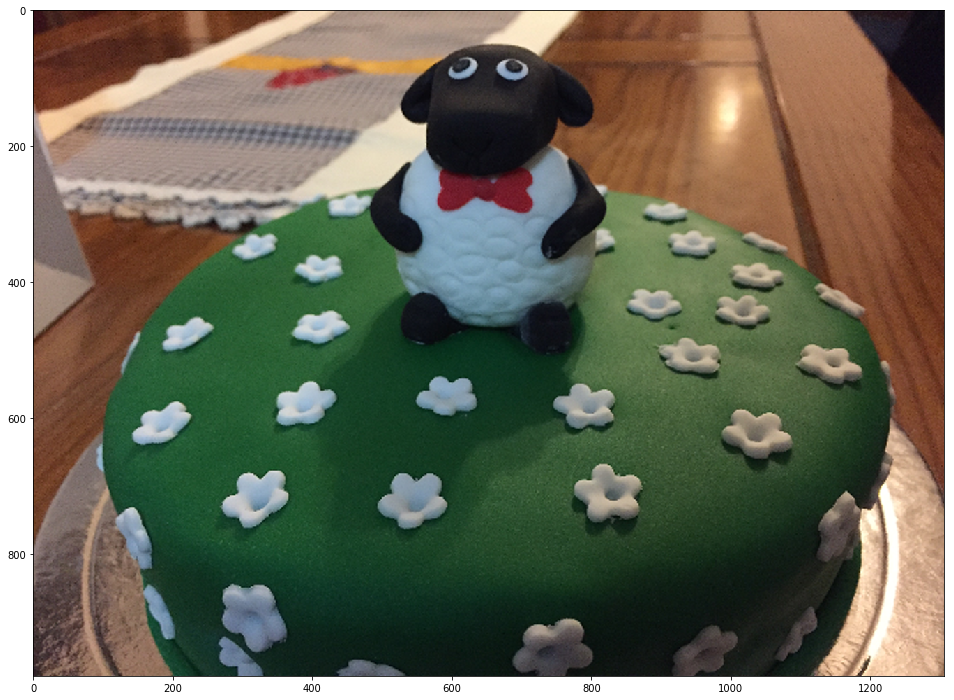

In [118]:
# Let's double the size of our image
img_scaled = cv2.resize(image_data, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('Scaling - Cubic Interpolation', img_scaled)

Showing Image: Scaling - Cubic Interpolation


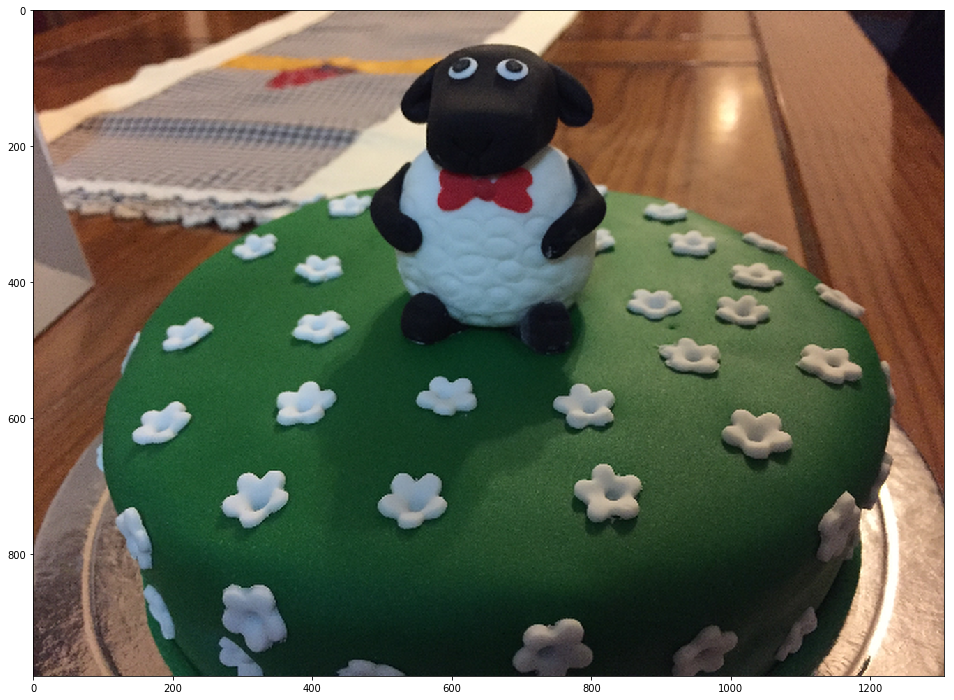

In [119]:
# Let's double the size of our image
img_scaled = cv2.resize(image_data, None, fx=2, fy=2, interpolation = cv2.INTER_LANCZOS4)
cv2.imshow('Scaling - Cubic Interpolation', img_scaled)

Showing Image: Scaling - Skewed Size


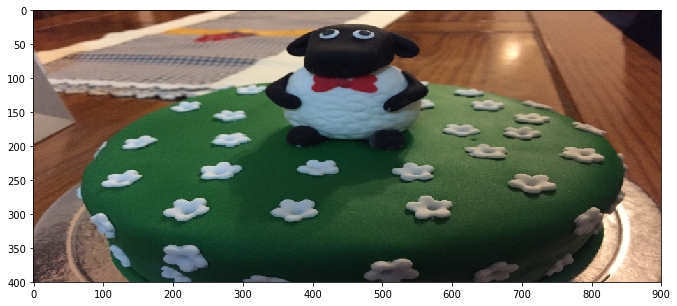

In [121]:
# Let's skew the re-sizing by setting exact dimensions
img_scaled = cv2.resize(image_data, (900, 400), interpolation = cv2.INTER_AREA)
cv2.imshow('Scaling - Skewed Size', img_scaled)

OpenCV has multiple interpolation techniques

- cv2.INTER_AREA - useful for downsampling images
- cv2.INTER_NEAREST - Fastest of them all
- cv2.INTER_LINEAR - usefull for zooming or upsampling
- cv2.INTER_CUBIC - Better quality
- cv2.INTER_LANCZOS4 - Best quality
